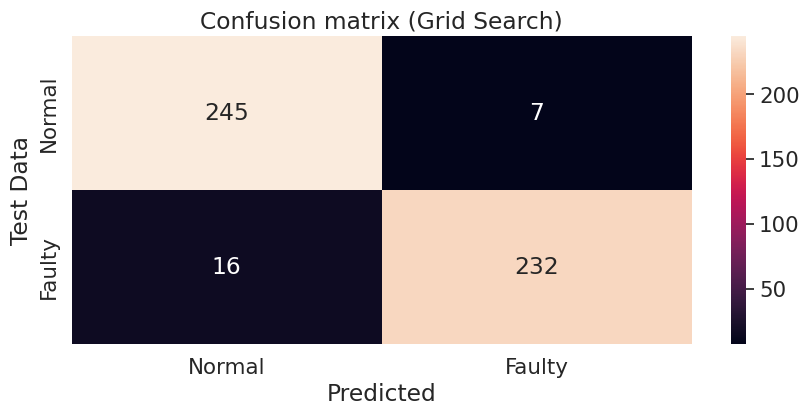

Classification Report (Grid Search):               precision    recall  f1-score   support

      Normal       0.94      0.97      0.96       252
      Faulty       0.97      0.94      0.95       248

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [20]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/project files/dataset_svm.csv")

# Sample a subset of the dataset
sampled_dataset = dataset.sample(n=2500, random_state=0) #2500- ACC:93,98

# Separate features (x) and target variable (y)
x = sampled_dataset.drop(columns=["fault"])
y = sampled_dataset["fault"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardize or normalize input features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
mean=sc.mean_
sd=sc.scale_
print("m=",mean,"sd=",sd)
X_test = sc.transform(X_test)

# Define a parameter array for hyperparameter tuning in grid search and randomized search.
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Create the SVM model
svm_classifier = SVC(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_grid = grid_search.best_params_
print("Best Parameters (Grid Search):", best_params_grid)

# Train the SVM model with the best parameters from grid search
svm_classifier_best_grid = SVC(**best_params_grid, random_state=0)
svm_classifier_best_grid.fit(X_train, y_train)

# Make predictions on the test set
y_pred_grid = svm_classifier_best_grid.predict(X_test)
#print("X_test",X_test,"\n","y_pred_grid", y_pred_grid)
# Evaluate the model from grid search
cm_grid = confusion_matrix(y_test, y_pred_grid)

index = ['Normal', 'Faulty']
columns = ['Normal', 'Faulty']
cm_df_grid = pd.DataFrame(cm_grid, columns, index)

plt.figure(figsize=(10, 4))
sn.set(font_scale=1.4)
sn.heatmap(cm_df_grid, annot=True, fmt='g')
plt.title('Confusion matrix (Grid Search)')
plt.xlabel('Predicted')
plt.ylabel('Test Data')
plt.show()

# Print the classification report from grid search
cr_grid = classification_report(y_test, y_pred_grid, target_names=['Normal', 'Faulty'])
print("Classification Report (Grid Search):", cr_grid)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


y_pred_grid [1 1 1 ... 1 0 1]


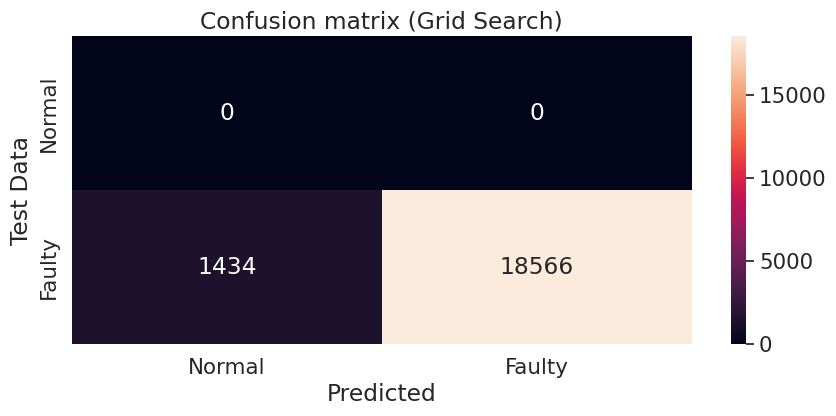

Classification Report (Grid Search):               precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
      Faulty       1.00      0.93      0.96     20000

    accuracy                           0.93     20000
   macro avg       0.50      0.46      0.48     20000
weighted avg       1.00      0.93      0.96     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
#faulty set complete testing - 93

ds = pd.read_csv("/content/drive/MyDrive/project files/acc_faulty_test.csv")
sd = ds.sample(n=20000, random_state=0)
xTest = sd.drop(columns=["fault"])
yTest = sd["fault"]
xTest = (xTest-sc.mean_)/sc.scale_

y_out_grid = svm_classifier_best_grid.predict(xTest)
print("y_pred_grid", y_out_grid)
# Evaluate the model from grid search
cm_grid = confusion_matrix(yTest, y_out_grid)

index = ['Normal', 'Faulty']
columns = ['Normal', 'Faulty']
cm_df_grid = pd.DataFrame(cm_grid, columns, index)

plt.figure(figsize=(10, 4))
sn.set(font_scale=1.4)
sn.heatmap(cm_df_grid, annot=True, fmt='g')
plt.title('Confusion matrix (Grid Search)')
plt.xlabel('Predicted')
plt.ylabel('Test Data')
plt.show()

cr_grid = classification_report(yTest, y_out_grid, target_names=['Normal', 'Faulty'])
print("Classification Report (Grid Search):", cr_grid)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


y_pred_grid [1 1 1 ... 1 1 0]


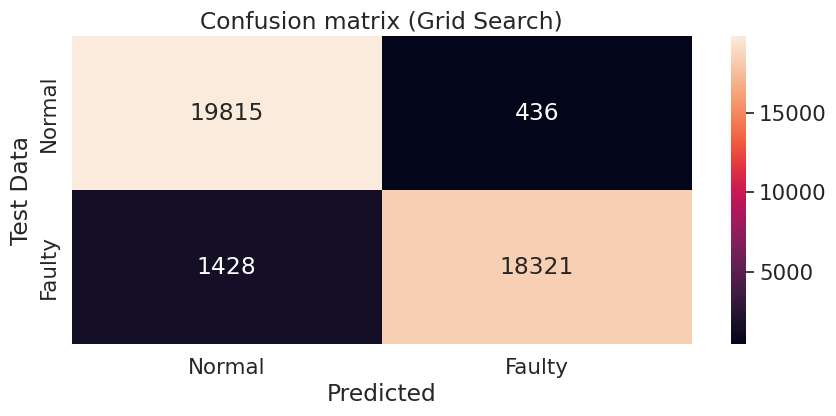

Classification Report (Grid Search):               precision    recall  f1-score   support

      Normal       0.93      0.98      0.96     20251
      Faulty       0.98      0.93      0.95     19749

    accuracy                           0.95     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.95      0.95      0.95     40000



In [32]:
#no faulty set complete testing - 98

ds = pd.read_csv("/content/drive/MyDrive/project files/dataset_svm.csv")
sd = ds.sample(n=40000, random_state=0)
xTest = sd.drop(columns=["fault"])
yTest = sd["fault"]
xTest = (xTest-sc.mean_)/sc.scale_

y_out_grid = svm_classifier_best_grid.predict(xTest)
print("y_pred_grid", y_out_grid)
# Evaluate the model from grid search
cm_grid = confusion_matrix(yTest, y_out_grid)

index = ['Normal', 'Faulty']
columns = ['Normal', 'Faulty']
cm_df_grid = pd.DataFrame(cm_grid, columns, index)

plt.figure(figsize=(10, 4))
sn.set(font_scale=1.4)
sn.heatmap(cm_df_grid, annot=True, fmt='g')
plt.title('Confusion matrix (Grid Search)')
plt.xlabel('Predicted')
plt.ylabel('Test Data')
plt.show()

cr_grid = classification_report(yTest, y_out_grid, target_names=['Normal', 'Faulty'])
print("Classification Report (Grid Search):", cr_grid)



In [31]:
# Save the decision tree model
from joblib import dump

# Specify the path where you want to save the SVM model
model_path = '/content/drive/MyDrive/project files/svm_model.pkl'

# Save the SVM model
dump(svm_classifier_best_grid, model_path)


['/content/drive/MyDrive/project files/svm_model.pkl']